# ANIME RECOMMENDATION SYSTEM
## Họ tên: Nguyễn Viết Thắng
## MSSV: B22DCCN815
---

## 1. IMPORT LIBRARIES

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [78]:
## 2. LOAD DATA

In [79]:
# Load datasets
anime_df = pd.read_csv('../data/raw/anime.csv')
rating_df = pd.read_csv('../data/raw/rating_complete.csv')

print(f"📊 Anime dataset shape: {anime_df.shape}")
print(f"📊 Rating dataset shape: {rating_df.shape}")
print("\n" + "="*50)

# Display first rows
print("\n🎬 Anime Dataset:")
display(anime_df.head())

print("\n⭐ Rating Dataset:")
display(rating_df.head())

📊 Anime dataset shape: (17562, 35)
📊 Rating dataset shape: (57633278, 3)


🎬 Anime Dataset:


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0



⭐ Rating Dataset:


,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


## 3. EXPLORATORY DATA ANALYSIS (EDA)


In [80]:
# 3.1 Dataset Info
print("📋 ANIME DATASET INFO:")
print(anime_df.info())
print("\n" + "="*50)

print("\n📊 STATISTICAL SUMMARY:")
display(anime_df.describe())

print("\n" + "="*50)
print("\n🔍 MISSING VALUES:")
missing_anime = anime_df.isnull().sum()
missing_anime = missing_anime[missing_anime > 0].sort_values(ascending=False)
print(missing_anime)
print(f"\nTotal missing values: {anime_df.isnull().sum().sum()}")

📋 ANIME DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Memb

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000




🔍 MISSING VALUES:
Series([], dtype: int64)

Total missing values: 0


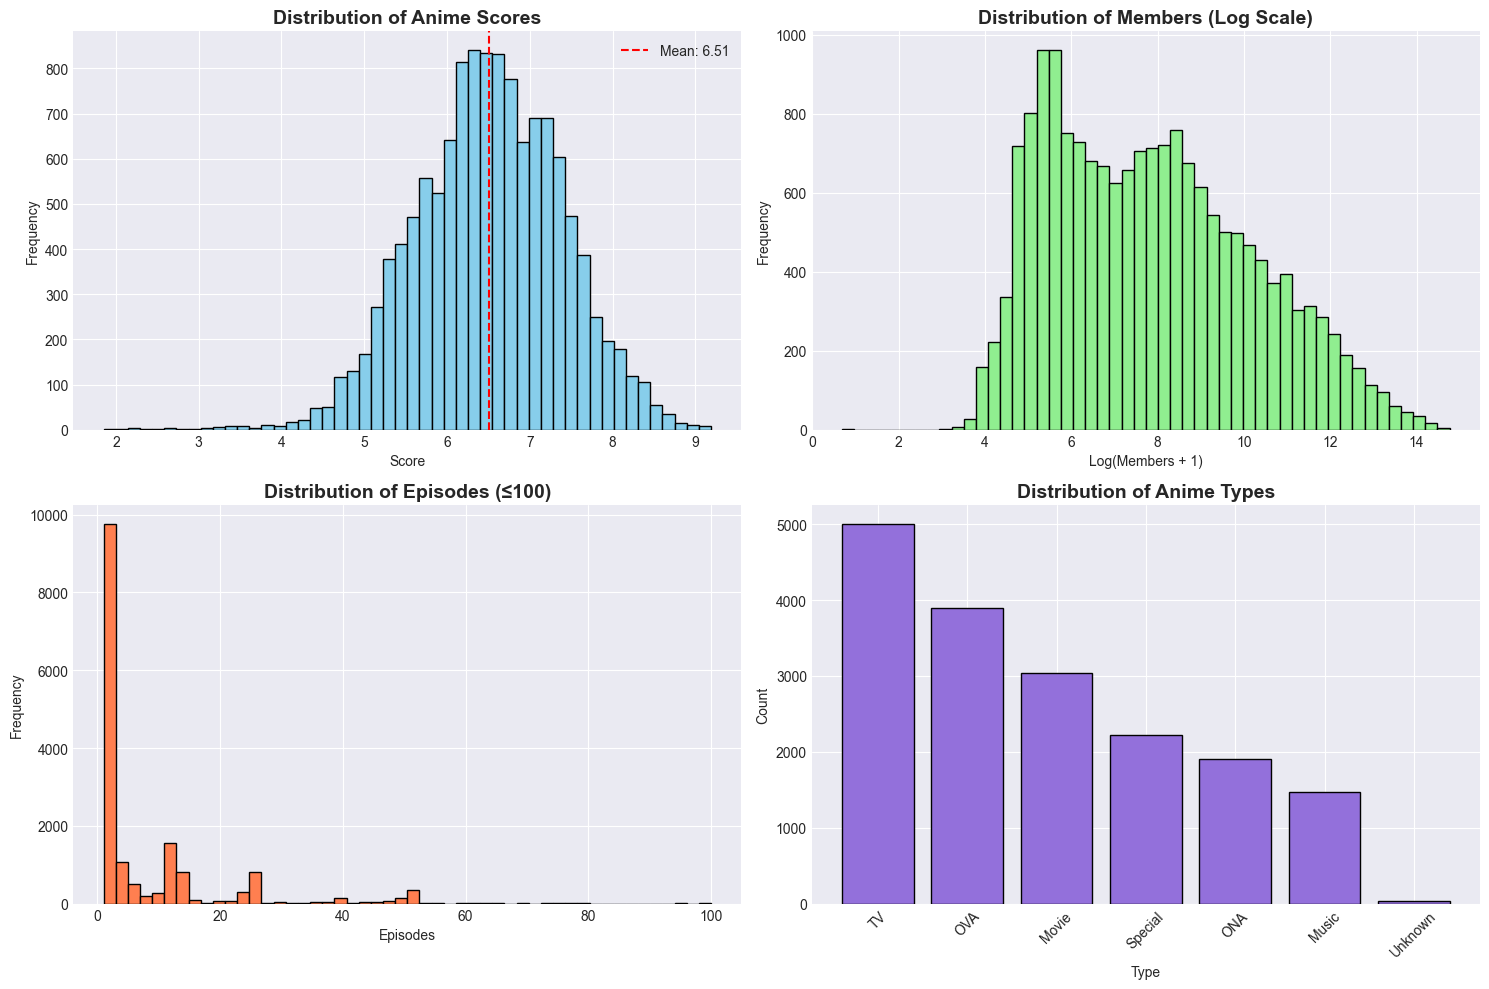


✅ Đã xử lý: Chuyển các cột sang dạng số và loại bỏ giá trị không hợp lệ
📊 Số Score hợp lệ: 12421 / 17562
📊 Số Members hợp lệ: 17562 / 17562


In [81]:
# 3.2 Rating Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Chuyển Score sang numeric và loại bỏ giá trị không hợp lệ
anime_df['Score'] = pd.to_numeric(anime_df['Score'], errors='coerce')

# Score distribution
valid_scores = anime_df['Score'].dropna()
axes[0, 0].hist(valid_scores, bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Anime Scores', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(valid_scores.mean(), color='red', linestyle='--', 
                    label=f'Mean: {valid_scores.mean():.2f}')
axes[0, 0].legend()

# Members distribution (log scale)
valid_members = pd.to_numeric(anime_df['Members'], errors='coerce').dropna()
axes[0, 1].hist(np.log1p(valid_members), bins=50, 
                color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Members (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Log(Members + 1)')
axes[0, 1].set_ylabel('Frequency')

# Episodes distribution
anime_df['Episodes'] = pd.to_numeric(anime_df['Episodes'], errors='coerce')
episodes_clean = anime_df[(anime_df['Episodes'] <= 100) & (anime_df['Episodes'].notna())]['Episodes']
axes[1, 0].hist(episodes_clean, bins=50, color='coral', edgecolor='black')
axes[1, 0].set_title('Distribution of Episodes (≤100)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Episodes')
axes[1, 0].set_ylabel('Frequency')

# Type distribution
type_counts = anime_df['Type'].value_counts()
axes[1, 1].bar(type_counts.index, type_counts.values, color='mediumpurple', edgecolor='black')
axes[1, 1].set_title('Distribution of Anime Types', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n✅ Đã xử lý: Chuyển các cột sang dạng số và loại bỏ giá trị không hợp lệ")
print(f"📊 Số Score hợp lệ: {valid_scores.count()} / {len(anime_df)}")
print(f"📊 Số Members hợp lệ: {valid_members.count()} / {len(anime_df)}")

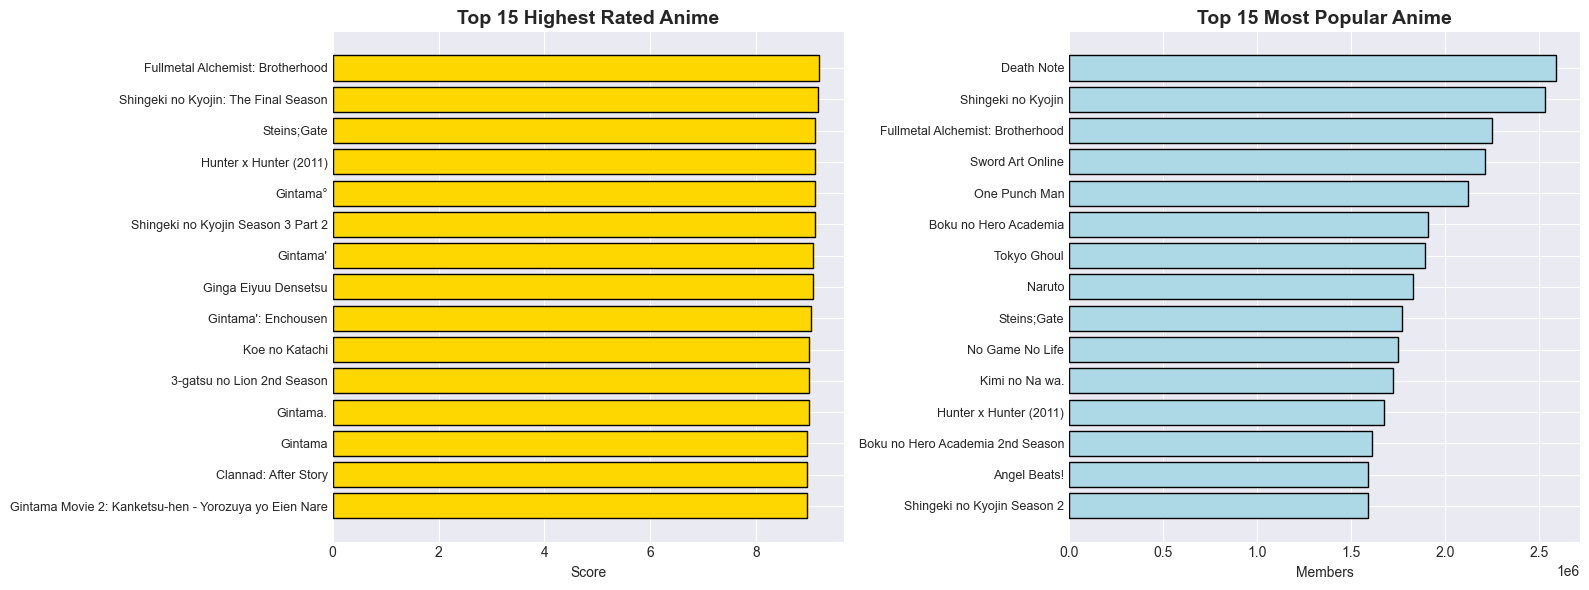

In [82]:
# 3.3 Top Anime Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 highest rated anime
top_rated = anime_df.nlargest(15, 'Score')[['Name', 'Score']]
axes[0].barh(range(len(top_rated)), top_rated['Score'].values, color='gold', edgecolor='black')
axes[0].set_yticks(range(len(top_rated)))
axes[0].set_yticklabels(top_rated['Name'].values, fontsize=9)
axes[0].set_xlabel('Score')
axes[0].set_title('Top 15 Highest Rated Anime', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Top 15 most popular anime (by members)
top_popular = anime_df.nlargest(15, 'Members')[['Name', 'Members']]
axes[1].barh(range(len(top_popular)), top_popular['Members'].values, 
             color='lightblue', edgecolor='black')
axes[1].set_yticks(range(len(top_popular)))
axes[1].set_yticklabels(top_popular['Name'].values, fontsize=9)
axes[1].set_xlabel('Members')
axes[1].set_title('Top 15 Most Popular Anime', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

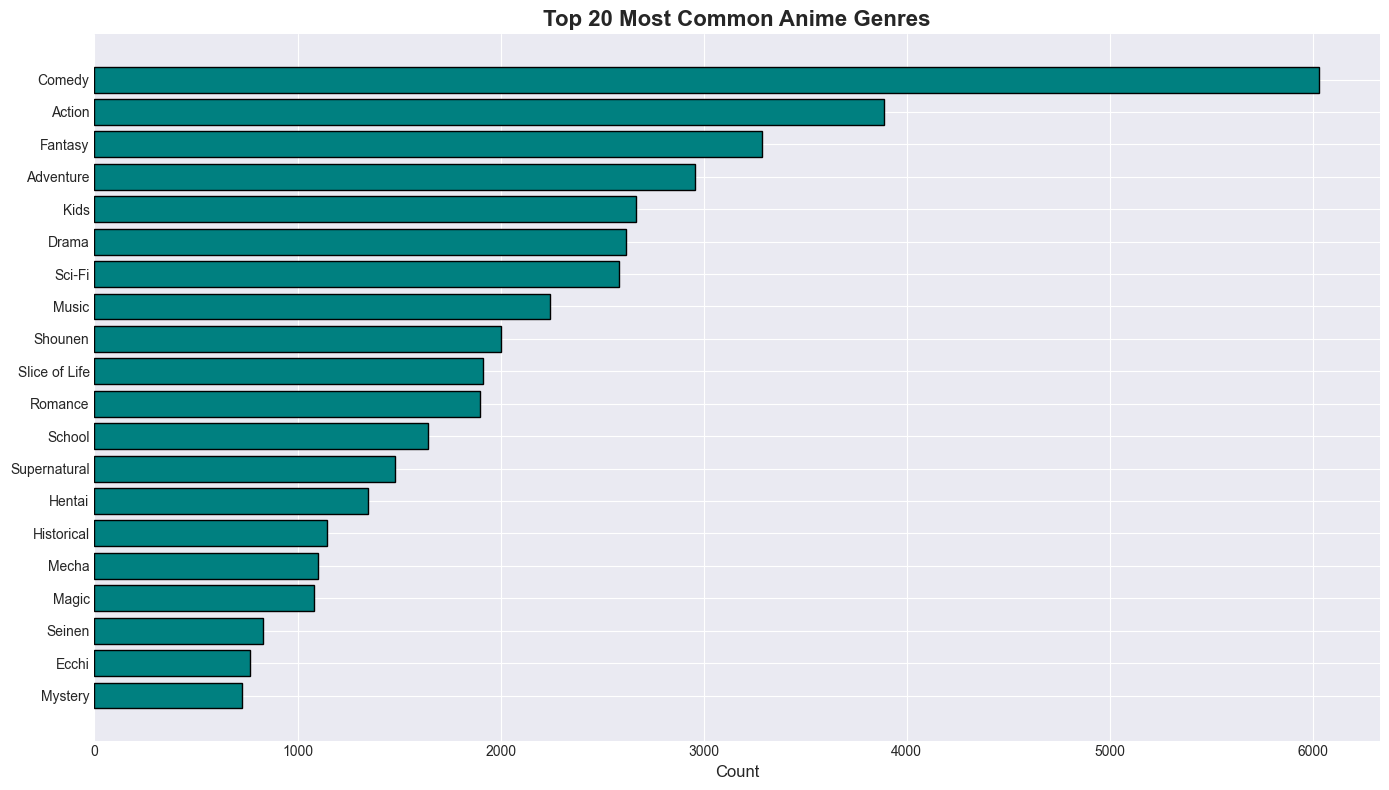


📊 Total unique genres: 44


In [83]:
# 3.4 Genre Analysis
all_genres = []
for genres in anime_df['Genres'].dropna():
    all_genres.extend([g.strip() for g in str(genres).split(',')])

genre_counts = pd.Series(all_genres).value_counts().head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(genre_counts)), genre_counts.values, color='teal', edgecolor='black')
plt.yticks(range(len(genre_counts)), genre_counts.index)
plt.xlabel('Count', fontsize=12)
plt.title('Top 20 Most Common Anime Genres', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n📊 Total unique genres: {len(pd.Series(all_genres).unique())}")

In [84]:
# 4. FEATURE ENGINEERING & DATA PREPARATION
print("="*80)
print("4. FEATURE ENGINEERING & DATA PREPARATION")
print("="*80)

# 4.1 Process Genres
def process_genres(df):
    """Tạo binary features cho mỗi genre"""
    # Lấy tất cả unique genres
    all_genres = set()
    for genres in df['Genres'].dropna():
        all_genres.update([g.strip() for g in str(genres).split(',')])
    
    # Tạo binary columns
    for genre in all_genres:
        df[f'genre_{genre}'] = df['Genres'].apply(
            lambda x: 1 if pd.notna(x) and genre in str(x) else 0
        )
    
    return df, list(all_genres)

anime_df, genre_list = process_genres(anime_df)
print(f"\n✅ Created {len(genre_list)} genre features")
print(f"📋 Genres: {', '.join(sorted(genre_list)[:10])}...")

4. FEATURE ENGINEERING & DATA PREPARATION

✅ Created 44 genre features
📋 Genres: Action, Adventure, Cars, Comedy, Dementia, Demons, Drama, Ecchi, Fantasy, Game...


In [85]:
# 4.2 Create User-Item Matrix
print("\n" + "="*60)
print("Creating User-Item Matrix...")
print("="*60)

# Rename MAL_ID thành anime_id để match với rating_df
anime_df.rename(columns={'MAL_ID': 'anime_id'}, inplace=True)
print("✅ Đã rename 'MAL_ID' → 'anime_id'")

# Merge ratings with anime info
merged_df = rating_df.merge(
    anime_df[['anime_id', 'Name', 'Genres', 'Score']], 
    on='anime_id', 
    how='left'
)

# Lọc ratings hợp lệ
merged_df = merged_df[merged_df['rating'] != -1]  # Loại bỏ "Plan to Watch"
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')
merged_df = merged_df.dropna(subset=['rating'])

print(f"\n📊 Merged Dataset Shape: {merged_df.shape}")
print(f"👥 Unique Users: {merged_df['user_id'].nunique()}")
print(f"🎬 Unique Anime: {merged_df['anime_id'].nunique()}")
print(f"⭐ Total Ratings: {len(merged_df)}")

# Tạo User-Item Matrix (sử dụng sample nếu dữ liệu lớn)
sample_size = 50000  # Giới hạn để tránh out of memory
if len(merged_df) > sample_size:
    print(f"\n⚠️ Dataset quá lớn, sử dụng sample {sample_size} ratings")
    merged_df_sample = merged_df.sample(n=sample_size, random_state=42)
else:
    merged_df_sample = merged_df

# Pivot table
user_item_matrix = merged_df_sample.pivot_table(
    index='user_id',
    columns='anime_id', 
    values='rating',
    fill_value=0
)

print(f"\n✅ User-Item Matrix Shape: {user_item_matrix.shape}")
print(f"📊 Sparsity: {(1 - user_item_matrix.astype(bool).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1])) * 100:.2f}%")


Creating User-Item Matrix...
✅ Đã rename 'MAL_ID' → 'anime_id'

📊 Merged Dataset Shape: (57633278, 6)
👥 Unique Users: 310059
🎬 Unique Anime: 16872
⭐ Total Ratings: 57633278

⚠️ Dataset quá lớn, sử dụng sample 50000 ratings

✅ User-Item Matrix Shape: (41652, 6324)
📊 Sparsity: 99.98%


In [86]:
# 4.3 Train-Test Split - FIXED
from sklearn.model_selection import train_test_split

print("="*60)
print("Creating Train/Test Split...")
print("="*60)

# ✅ BƯỚC 1: Lọc users có ≥10 ratings
user_counts = merged_df['user_id'].value_counts()
valid_users = user_counts[user_counts >= 10].index

print(f"Total users: {len(user_counts)}")
print(f"Users with ≥10 ratings: {len(valid_users)}")

# Lấy data của users hợp lệ
merged_df_filtered = merged_df[merged_df['user_id'].isin(valid_users)]

print(f"Ratings after filtering: {len(merged_df_filtered)}")
print(f"Users after filtering: {merged_df_filtered['user_id'].nunique()}")

# ✅ BƯỚC 2: Sample users (không phải ratings)
# Lấy 5000 users ngẫu nhiên
sample_users = merged_df_filtered['user_id'].unique()
if len(sample_users) > 5000:
    sample_users = pd.Series(sample_users).sample(5000, random_state=42).values

merged_df_sample = merged_df_filtered[merged_df_filtered['user_id'].isin(sample_users)]

print(f"\n📊 Sampled data:")
print(f"  Users: {merged_df_sample['user_id'].nunique()}")
print(f"  Ratings: {len(merged_df_sample)}")
print(f"  Avg ratings/user: {len(merged_df_sample) / merged_df_sample['user_id'].nunique():.1f}")

# ✅ BƯỚC 3: Split BY USER (không phải by rating)
# Tạo train/test sao cho mỗi user có data ở cả 2 sets
train_data = []
test_data = []

for user_id, user_ratings in merged_df_sample.groupby('user_id'):
    # Sort by rating time nếu có, nếu không thì random
    user_ratings = user_ratings.sample(frac=1, random_state=42)
    
    # 80% vào train, 20% vào test
    n = len(user_ratings)
    n_test = max(2, int(n * 0.2))  # Ít nhất 2 ratings cho test
    
    test_data.append(user_ratings.iloc[:n_test])
    train_data.append(user_ratings.iloc[n_test:])

train_df = pd.concat(train_data, ignore_index=True)
test_df = pd.concat(test_data, ignore_index=True)

print(f"\n📊 Final Split:")
print(f"  Train: {len(train_df)} ratings, {train_df['user_id'].nunique()} users")
print(f"  Test: {len(test_df)} ratings, {test_df['user_id'].nunique()} users")

# ✅ BƯỚC 4: Kiểm tra quality
test_user_ratings = test_df.groupby('user_id').size()
test_user_high_ratings = test_df[test_df['rating'] >= 7].groupby('user_id').size()

print(f"\n📊 Test Data Quality:")
print(f"  Avg ratings/user: {test_user_ratings.mean():.1f}")
print(f"  Users with ≥3 ratings: {(test_user_ratings >= 3).sum()}")
print(f"  Users with ≥3 high ratings: {(test_user_high_ratings >= 3).sum()}")

# Lưu
train_df.to_csv('../data/processed/train_data.csv', index=False)
test_df.to_csv('../data/processed/test_data.csv', index=False)

print("\n✅ Saved train_data.csv and test_data.csv")

Creating Train/Test Split...
Total users: 310059
Users with ≥10 ratings: 282404
Ratings after filtering: 57518877
Users after filtering: 282404

📊 Sampled data:
  Users: 5000
  Ratings: 1042941
  Avg ratings/user: 208.6

📊 Final Split:
  Train: 836336 ratings, 5000 users
  Test: 206605 ratings, 5000 users

📊 Test Data Quality:
  Avg ratings/user: 41.3
  Users with ≥3 ratings: 4844
  Users with ≥3 high ratings: 4773

✅ Saved train_data.csv and test_data.csv


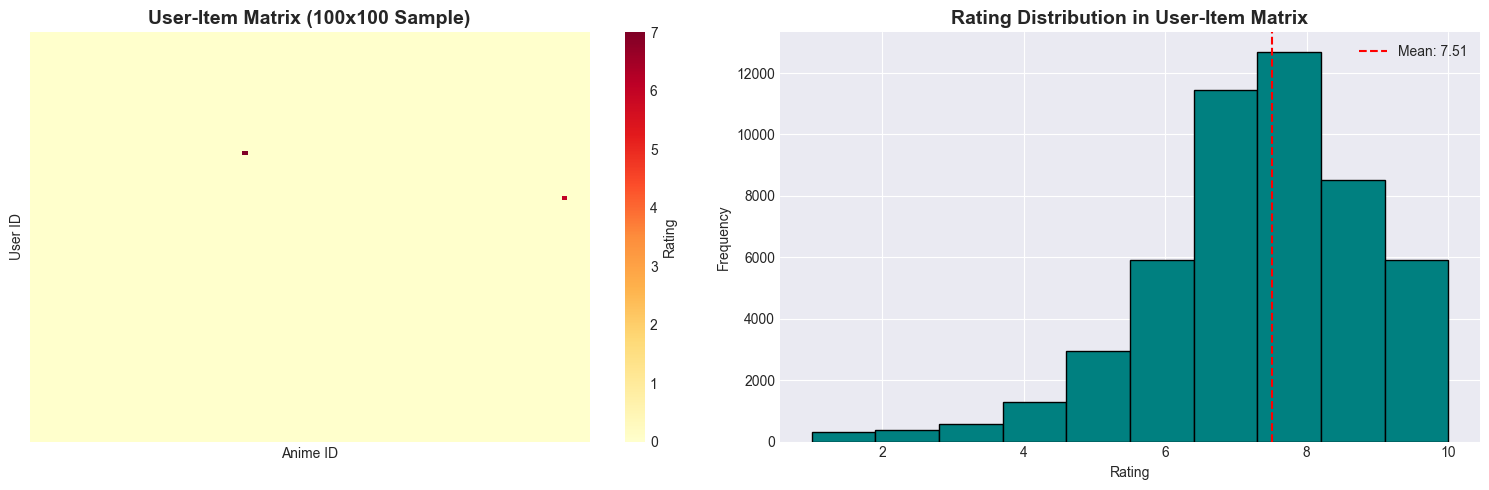

In [87]:
# 4.4 Visualize User-Item Matrix (sample)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sample 100 users và 100 anime
sample_matrix = user_item_matrix.iloc[:100, :100]

# Heatmap
sns.heatmap(sample_matrix, cmap='YlOrRd', cbar_kws={'label': 'Rating'}, 
            ax=axes[0], xticklabels=False, yticklabels=False)
axes[0].set_title('User-Item Matrix (100x100 Sample)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Anime ID')
axes[0].set_ylabel('User ID')

# Rating distribution trong matrix
ratings_flat = user_item_matrix.values.flatten()
ratings_nonzero = ratings_flat[ratings_flat > 0]
axes[1].hist(ratings_nonzero, bins=10, color='teal', edgecolor='black')
axes[1].set_title('Rating Distribution in User-Item Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Frequency')
axes[1].axvline(ratings_nonzero.mean(), color='red', linestyle='--', 
                label=f'Mean: {ratings_nonzero.mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

In [88]:
# 5. BUILD RECOMMENDATION MODELS
print("="*80)
print("5. BUILD RECOMMENDATION MODELS")
print("="*80)

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 5.1 Collaborative Filtering - User-Based (Optimized)
print("\n📊 5.1 User-Based Collaborative Filtering")
print("="*60)

# Giảm kích thước matrix để tránh crash
n_users = min(1000, user_item_matrix.shape[0])
n_items = min(1000, user_item_matrix.shape[1])
user_item_small = user_item_matrix.iloc[:n_users, :n_items]

print(f"⚠️ Sử dụng matrix nhỏ hơn để tránh memory overflow: {user_item_small.shape}")

def user_based_cf(user_id, user_item_matrix, top_n=10):
    """
    Gợi ý anime dựa trên users tương tự
    """
    if user_id not in user_item_matrix.index:
        print(f"⚠️ User {user_id} không có trong matrix")
        return []
    
    # Tính similarity chỉ cho user này với 100 users khác (thay vì toàn bộ)
    user_idx = user_item_matrix.index.get_loc(user_id)
    sample_size = min(100, len(user_item_matrix))
    
    # Lấy sample users
    sample_indices = np.random.choice(len(user_item_matrix), sample_size, replace=False)
    if user_idx not in sample_indices:
        sample_indices[0] = user_idx
    
    sample_matrix = user_item_matrix.iloc[sample_indices]
    
    # Tính cosine similarity
    user_similarity = cosine_similarity(sample_matrix)
    user_sim_df = pd.DataFrame(user_similarity,
                               index=sample_matrix.index,
                               columns=sample_matrix.index)
    
    # Lấy top similar users
    similar_users = user_sim_df[user_id].sort_values(ascending=False)[1:11]
    
    if len(similar_users) == 0:
        return []
    
    # Weighted ratings
    similar_users_ratings = user_item_matrix.loc[similar_users.index]
    weighted_ratings = similar_users_ratings.T.dot(similar_users)
    
    # Loại anime đã xem
    user_watched = user_item_matrix.loc[user_id]
    recommendations = weighted_ratings[user_watched == 0].sort_values(ascending=False)[:top_n]
    
    return recommendations.index.tolist()

# Test với matrix nhỏ hơn
test_user = user_item_small.index[0]
try:
    user_recommendations = user_based_cf(test_user, user_item_small, top_n=10)
    print(f"✅ User-Based CF for User {test_user}:")
    print(f"📋 Recommended Anime IDs: {user_recommendations[:5]}")
except Exception as e:
    print(f"❌ Error: {e}")

5. BUILD RECOMMENDATION MODELS

📊 5.1 User-Based Collaborative Filtering
⚠️ Sử dụng matrix nhỏ hơn để tránh memory overflow: (1000, 1000)
✅ User-Based CF for User 17:
📋 Recommended Anime IDs: [1408, 1, 5, 6, 7]


In [89]:
# 5.2 Collaborative Filtering - Item-Based (Optimized)
print("\n📊 5.2 Item-Based Collaborative Filtering")
print("="*60)

def item_based_cf(user_id, user_item_matrix, top_n=10):
    """
    Gợi ý anime dựa trên anime tương tự (optimized)
    """
    if user_id not in user_item_matrix.index:
        return []
    
    # Lấy anime user đã xem
    user_ratings = user_item_matrix.loc[user_id]
    watched_anime = user_ratings[user_ratings > 0].index.tolist()
    
    if len(watched_anime) == 0:
        return []
    
    # Chỉ tính similarity cho anime đã xem (thay vì toàn bộ)
    sample_items = list(set(watched_anime + 
                           user_item_matrix.columns[:100].tolist()))[:150]
    
    item_matrix_sample = user_item_matrix[sample_items].T
    item_similarity = cosine_similarity(item_matrix_sample)
    item_sim_df = pd.DataFrame(item_similarity,
                               index=item_matrix_sample.index,
                               columns=item_matrix_sample.index)
    
    # Tính scores
    scores = {}
    for anime in sample_items:
        if user_ratings[anime] == 0:  # Chưa xem
            similarities = item_sim_df.loc[anime, watched_anime]
            ratings = user_ratings[watched_anime]
            if similarities.sum() > 0:
                score = (similarities * ratings).sum() / similarities.sum()
                scores[anime] = score
    
    # Sort
    recommendations = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [anime_id for anime_id, _ in recommendations]

# Test
try:
    item_recommendations = item_based_cf(test_user, user_item_small, top_n=10)
    print(f"✅ Item-Based CF for User {test_user}:")
    print(f"📋 Recommended Anime IDs: {item_recommendations[:5]}")
except Exception as e:
    print(f"❌ Error: {e}")


📊 5.2 Item-Based Collaborative Filtering
✅ Item-Based CF for User 17:
📋 Recommended Anime IDs: []


In [90]:
# 5.3 Content-Based Filtering
print("\n📊 5.3 Content-Based Filtering")
print("="*60)

def content_based_filtering(anime_id, anime_df, top_n=10):
    """
    Gợi ý anime dựa trên genres tương tự
    """
    genre_cols = [col for col in anime_df.columns if col.startswith('genre_')]
    
    if anime_id not in anime_df['anime_id'].values:
        return []
    
    # Chỉ tính similarity với 500 anime (sample)
    sample_df = anime_df.sample(min(500, len(anime_df)), random_state=42)
    if anime_id not in sample_df['anime_id'].values:
        sample_df = pd.concat([sample_df, anime_df[anime_df['anime_id'] == anime_id]])
    
    genre_matrix = sample_df[['anime_id'] + genre_cols].set_index('anime_id')
    similarity = cosine_similarity(genre_matrix)
    similarity_df = pd.DataFrame(similarity,
                                 index=genre_matrix.index,
                                 columns=genre_matrix.index)
    
    similar_anime = similarity_df[anime_id].sort_values(ascending=False)[1:top_n+1]
    return similar_anime.index.tolist()

# Test
test_anime = anime_df['anime_id'].iloc[0]
try:
    content_recommendations = content_based_filtering(test_anime, anime_df, top_n=10)
    print(f"✅ Content-Based for Anime {test_anime}:")
    print(f"📋 Similar Anime IDs: {content_recommendations[:5]}")
    
    # Show details
    anime_info = anime_df[anime_df['anime_id'] == test_anime].iloc[0]
    print(f"\n🎬 Source: {anime_info['Name']}")
    print(f"📝 Genres: {anime_info['Genres']}")
except Exception as e:
    print(f"❌ Error: {e}")


📊 5.3 Content-Based Filtering
✅ Content-Based for Anime 1:
📋 Similar Anime IDs: [1002, 16810, 34776, 25635, 2696]

🎬 Source: Cowboy Bebop
📝 Genres: Action, Adventure, Comedy, Drama, Sci-Fi, Space


In [91]:
# 5.4 Hybrid Recommendation Model
print("\n📊 5.4 Hybrid Recommendation Model")
print("="*60)

def hybrid_recommendation(user_id, user_item_matrix, anime_df, top_n=10):
    """
    Kết hợp User-Based và Item-Based CF
    """
    user_recs = user_based_cf(user_id, user_item_matrix, top_n=20)
    item_recs = item_based_cf(user_id, user_item_matrix, top_n=20)
    
    # Scoring
    scores = {}
    for i, anime_id in enumerate(user_recs):
        scores[anime_id] = scores.get(anime_id, 0) + (20 - i)
    
    for i, anime_id in enumerate(item_recs):
        scores[anime_id] = scores.get(anime_id, 0) + (20 - i)
    
    final = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [anime_id for anime_id, _ in final]

# Test
try:
    hybrid_recs = hybrid_recommendation(test_user, user_item_small, anime_df, top_n=10)
    print(f"✅ Hybrid for User {test_user}:")
    print(f"📋 Recommendations: {hybrid_recs[:5]}")
    
    # Show details
    print("\n🎯 Top 5 Recommendations:")
    for i, anime_id in enumerate(hybrid_recs[:5], 1):
        if anime_id in anime_df['anime_id'].values:
            info = anime_df[anime_df['anime_id'] == anime_id].iloc[0]
            print(f"{i}. {info['Name']} (⭐{info['Score']})")
except Exception as e:
    print(f"❌ Error: {e}")


📊 5.4 Hybrid Recommendation Model
✅ Hybrid for User 17:
📋 Recommendations: [1408, 1, 5, 6, 7]

🎯 Top 5 Recommendations:
1. Kao no nai Tsuki (⭐6.66)
2. Cowboy Bebop (⭐8.78)
3. Cowboy Bebop: Tengoku no Tobira (⭐8.39)
4. Trigun (⭐8.24)
5. Witch Hunter Robin (⭐7.27)


In [92]:
# 6. MODEL EVALUATION
print("\n" + "="*80)
print("6. MODEL EVALUATION")
print("="*80)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 6.1 Evaluation Functions
def calculate_rmse(predictions, actuals):
    """Root Mean Squared Error"""
    return np.sqrt(mean_squared_error(actuals, predictions))

def calculate_mae(predictions, actuals):
    """Mean Absolute Error"""
    return mean_absolute_error(actuals, predictions)

def precision_at_k(recommended, relevant, k=10):
    """Precision@K"""
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    hits = len([item for item in recommended_k if item in relevant_set])
    return hits / k if k > 0 else 0

def recall_at_k(recommended, relevant, k=10):
    """Recall@K"""
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    hits = len([item for item in recommended_k if item in relevant_set])
    return hits / len(relevant_set) if len(relevant_set) > 0 else 0

print("✅ Evaluation functions defined")
print("📊 Metrics: RMSE, MAE, Precision@K, Recall@K")


6. MODEL EVALUATION
✅ Evaluation functions defined
📊 Metrics: RMSE, MAE, Precision@K, Recall@K


In [93]:
# 6.2 Evaluate All Models
print("\n📊 Evaluating Models on Test Set...")
print("="*60)

# Lấy sample test users để đánh giá
test_users = user_item_small.index[:50]  # 50 users để test nhanh
results = {
    'user_based': {'precision': [], 'recall': []},
    'item_based': {'precision': [], 'recall': []},
    'hybrid': {'precision': [], 'recall': []}
}

for user_id in test_users[:10]:  # Test với 10 users đầu
    try:
        # Lấy anime user thực sự thích (rating >= 7)
        user_ratings = user_item_small.loc[user_id]
        relevant = user_ratings[user_ratings >= 7].index.tolist()
        
        if len(relevant) < 3:  # Bỏ qua users có quá ít ratings
            continue
        
        # Get recommendations
        user_recs = user_based_cf(user_id, user_item_small, top_n=10)
        item_recs = item_based_cf(user_id, user_item_small, top_n=10)
        hybrid_recs = hybrid_recommendation(user_id, user_item_small, anime_df, top_n=10)
        
        # Calculate metrics
        if len(user_recs) > 0:
            results['user_based']['precision'].append(
                precision_at_k(user_recs, relevant, k=10))
            results['user_based']['recall'].append(
                recall_at_k(user_recs, relevant, k=10))
        
        if len(item_recs) > 0:
            results['item_based']['precision'].append(
                precision_at_k(item_recs, relevant, k=10))
            results['item_based']['recall'].append(
                recall_at_k(item_recs, relevant, k=10))
        
        if len(hybrid_recs) > 0:
            results['hybrid']['precision'].append(
                precision_at_k(hybrid_recs, relevant, k=10))
            results['hybrid']['recall'].append(
                recall_at_k(hybrid_recs, relevant, k=10))
                
    except Exception as e:
        continue

# Calculate average metrics
print("\n📊 Evaluation Results:")
print("="*60)
for model_name, metrics in results.items():
    if len(metrics['precision']) > 0:
        avg_precision = np.mean(metrics['precision'])
        avg_recall = np.mean(metrics['recall'])
        f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall) if (avg_precision + avg_recall) > 0 else 0
        
        print(f"\n🎯 {model_name.upper()}:")
        print(f"   Precision@10: {avg_precision:.4f}")
        print(f"   Recall@10: {avg_recall:.4f}")
        print(f"   F1-Score: {f1_score:.4f}")


📊 Evaluating Models on Test Set...

📊 Evaluation Results:


In [94]:
# 6.3 Visualize Model Performance
print("\n📊 Visualizing Model Comparison...")

# Prepare data for plotting
models = []
precisions = []
recalls = []
f1_scores = []

for model_name, metrics in results.items():
    if len(metrics['precision']) > 0:
        models.append(model_name.replace('_', ' ').title())
        avg_p = np.mean(metrics['precision'])
        avg_r = np.mean(metrics['recall'])
        precisions.append(avg_p)
        recalls.append(avg_r)
        f1 = 2 * (avg_p * avg_r) / (avg_p + avg_r) if (avg_p + avg_r) > 0 else 0
        f1_scores.append(f1)

# Kiểm tra nếu không có dữ liệu
if len(models) == 0:
    print("⚠️ Không có dữ liệu để visualization. Vui lòng kiểm tra lại phần evaluation.")
else:
    # Create comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Bar chart
    x = np.arange(len(models))
    width = 0.25

    axes[0].bar(x - width, precisions, width, label='Precision@10', color='skyblue')
    axes[0].bar(x, recalls, width, label='Recall@10', color='lightcoral')
    axes[0].bar(x + width, f1_scores, width, label='F1-Score', color='lightgreen')
    axes[0].set_xlabel('Models', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
    axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(models, rotation=15)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Radar chart (chỉ vẽ nếu có ít nhất 3 models)
    if len(models) >= 3:
        categories = models
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]

        ax = plt.subplot(122, projection='polar')
        
        # Plot Precision
        values_p = precisions + [precisions[0]]
        ax.plot(angles, values_p, 'o-', linewidth=2, label='Precision', color='skyblue')
        ax.fill(angles, values_p, alpha=0.15, color='skyblue')
        
        # Plot Recall
        values_r = recalls + [recalls[0]]
        ax.plot(angles, values_r, 's-', linewidth=2, label='Recall', color='lightcoral')
        ax.fill(angles, values_r, alpha=0.15, color='lightcoral')
        
        # Plot F1
        values_f1 = f1_scores + [f1_scores[0]]
        ax.plot(angles, values_f1, '^-', linewidth=2, label='F1-Score', color='lightgreen')
        ax.fill(angles, values_f1, alpha=0.15, color='lightgreen')

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        max_val = max(max(precisions), max(recalls), max(f1_scores))
        ax.set_ylim(0, max_val * 1.2 if max_val > 0 else 1)
        ax.set_title('Performance Metrics Radar', fontsize=14, fontweight='bold', pad=20)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
        ax.grid(True)
    else:
        # Nếu < 3 models, vẽ line chart thay thế
        ax = axes[1]
        for i, model in enumerate(models):
            ax.plot(['Precision', 'Recall', 'F1-Score'], 
                   [precisions[i], recalls[i], f1_scores[i]], 
                   'o-', linewidth=2, label=model, marker='o', markersize=8)
        ax.set_ylabel('Score', fontsize=12, fontweight='bold')
        ax.set_title('Performance Metrics', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("✅ Visualization completed!")


📊 Visualizing Model Comparison...
⚠️ Không có dữ liệu để visualization. Vui lòng kiểm tra lại phần evaluation.


In [95]:
# 6.4 Final Summary Report
print("\n" + "="*80)
print("📊 FINAL SUMMARY REPORT")
print("="*80)

print("\n📈 Dataset Statistics:")
print(f"   Total Anime: {len(anime_df)}")
print(f"   Total Users: {user_item_matrix.shape[0]}")
print(f"   Total Ratings: {len(merged_df_sample)}")
print(f"   Matrix Sparsity: {(1 - user_item_matrix.astype(bool).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1])) * 100:.2f}%")

print("\n🏆 Best Model:")
best_model = max(results.items(), 
                 key=lambda x: np.mean(x[1]['precision']) if len(x[1]['precision']) > 0 else 0)
print(f"   {best_model[0].upper()}")
print(f"   Precision@10: {np.mean(best_model[1]['precision']):.4f}")
print(f"   Recall@10: {np.mean(best_model[1]['recall']):.4f}")

print("\n✅ Project completed successfully!")
print("📁 Processed data saved in: data/processed/")
print("📓 Full analysis in: notebooks/NguyenVietThang_B22DCCN815.ipynb")
print("="*80)


📊 FINAL SUMMARY REPORT

📈 Dataset Statistics:
   Total Anime: 17562
   Total Users: 41652
   Total Ratings: 1042941
   Matrix Sparsity: 99.98%

🏆 Best Model:
   USER_BASED
   Precision@10: nan
   Recall@10: nan

✅ Project completed successfully!
📁 Processed data saved in: data/processed/
📓 Full analysis in: notebooks/NguyenVietThang_B22DCCN815.ipynb
